<a href="https://colab.research.google.com/github/anko191/Python_Kaggle/blob/master/scikit_learn/scikit_learn_SVM_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

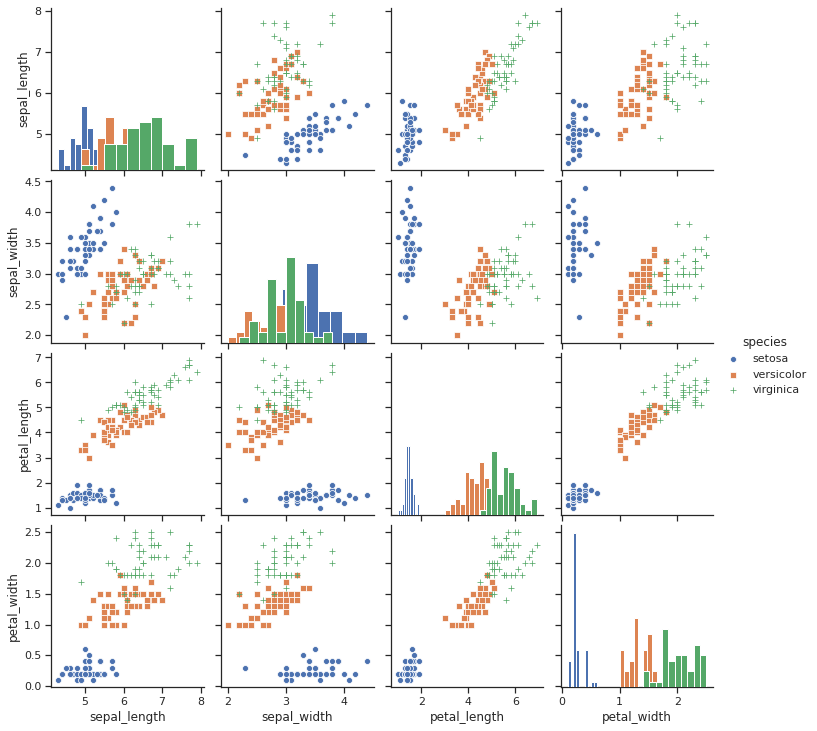

In [5]:
import seaborn as sns
sns.set(style="ticks")
df = sns.load_dataset("iris")
sns.pairplot(df, hue = 'species', markers=["o", "s", "+"],diag_kind = 'hist' ) # default diaf_kind = 'kde'?

In [6]:
import pandas as pd
from sklearn import datasets, model_selection, svm, metrics

In [7]:
iris = datasets.load_iris()

In [9]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [10]:
iris_data = pd.DataFrame(data = iris.data, columns = iris.feature_names)
print(iris_data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [11]:
iris_label = pd.Series(data=iris.target)

In [12]:
print(iris_label.head())

0    0
1    0
2    0
3    0
4    0
dtype: int64


In [14]:
pd.options.display.max_columns = 50

In [15]:
data_train, data_test, label_train, label_test = model_selection.train_test_split(iris_data, iris_label)
print(data_train.head())

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
27                 5.2               3.5                1.5               0.2
33                 5.5               4.2                1.4               0.2
123                6.3               2.7                4.9               1.8
72                 6.3               2.5                4.9               1.5
24                 4.8               3.4                1.9               0.2


In [16]:
print(label_train.head())

27     0
33     0
123    2
72     1
24     0
dtype: int64


In [17]:
print(len(data_train), len(data_test))

112 38


In [18]:
clf = svm.SVC()
clf.fit(data_train, label_train)
pre = clf.predict(data_test)

In [19]:
print(pre)

[2 0 0 1 2 2 1 2 0 0 1 0 2 2 1 1 0 1 0 1 1 2 1 1 2 0 1 1 1 2 0 2 2 2 1 1 1
 1]


In [20]:
# result confirm
ac_score = metrics.accuracy_score(label_test, pre)
print(ac_score)

0.9210526315789473


In [25]:
from sklearn import datasets, model_selection, svm, metrics
mnist = datasets.fetch_openml('mnist_784', version = 1, data_home = "/content/") # insted of fetch_mldata
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])


In [26]:
mnist_data = mnist.data / 255
mnist_label = mnist.target

In [27]:
print(mnist_data.shape)

(70000, 784)


In [28]:
mnist_label.shape

(70000,)

In [30]:
train_size = 500
test_size = 100
data_train, data_test, label_train, label_test = model_selection.train_test_split(mnist_data,mnist_label, test_size=test_size, train_size = train_size)

In [31]:
clf = svm.SVC()
clf.fit(data_train, label_train)
pre = clf.predict(data_test)
ac_score = metrics.accuracy_score(label_test, pre)
print(ac_score)

0.81


In [32]:
import timeit

num = 10

train_size = 500
test_size = 100
data_train, data_test, label_train, label_test = model_selection.train_test_split(mnist_data, mnist_label, test_size=test_size, train_size=train_size)


In [33]:
clf = svm.SVC()
print(timeit.timeit(lambda:clf.fit(data_train, label_train), number = num) / num)
pre = clf.predict(data_test)
ac_score = metrics.accuracy_score(label_test, pre)
print(ac_score)


0.39152185539996937
0.87


In [34]:
clf = svm.LinearSVC()
print(timeit.timeit(lambda:clf.fit(data_train, label_train), number = num) / num)
pre = clf.predict(data_test)
ac_score = metrics.accuracy_score(label_test, pre)
print(ac_score)


0.11365929789999427
0.78


In [35]:
train_size = 10000
test_size = 1000
data_train, data_test, label_train, label_test = model_selection.train_test_split(mnist_data, mnist_label, test_size = test_size, train_size = train_size)


In [36]:
clf = svm.LinearSVC()
print(timeit.timeit(lambda:clf.fit(data_train,label_train), number=num)/num)
pre = clf.predict(data_test)
ac_score = metrics.accuracy_score(label_test, pre)
print(ac_score)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

6.06184649099996
0.896


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [37]:
# どのようにご分類されたかを確認
co_mat = metrics.confusion_matrix(label_test, pre)
print(co_mat)

[[ 83   0   1   0   0   1   1   0   1   0]
 [  0 106   0   1   2   1   0   0   1   0]
 [  2   1  75   2   0   1   1   3   3   0]
 [  0   0   3  93   0   6   0   0   2   3]
 [  0   0   2   0 111   0   0   0   1   4]
 [  2   0   0   4   1  86   3   0   4   0]
 [  0   0   2   0   0   4 101   0   0   0]
 [  2   1   0   0   3   1   0  98   0   1]
 [  1   5   1   4   2   6   3   1  71   1]
 [  0   0   0   2   4   0   0   3   0  72]]


In [38]:
import scipy.stats
l = [0,1,2,3,4]
print(l)

[0, 1, 2, 3, 4]


In [39]:
print(scipy.stats.zscore(l))

[-1.41421356 -0.70710678  0.          0.70710678  1.41421356]


In [40]:
print(scipy.stats.zscore(l, ddof = 1))

[-1.26491106 -0.63245553  0.          0.63245553  1.26491106]


In [41]:
l_2d = [[0,1,2], [3,4,5], [6,7,8]]
print(l_2d)
print(scipy.stats.zscore(l_2d))

[[0, 1, 2], [3, 4, 5], [6, 7, 8]]
[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]


In [42]:
print(scipy.stats.zscore(l_2d, axis = 1))
print(scipy.stats.zscore(l_2d, axis = 1, ddof = 1))

[[-1.22474487  0.          1.22474487]
 [-1.22474487  0.          1.22474487]
 [-1.22474487  0.          1.22474487]]
[[-1.  0.  1.]
 [-1.  0.  1.]
 [-1.  0.  1.]]


In [43]:
print(scipy.stats.zscore(l_2d, axis = None))
print(scipy.stats.zscore(l_2d, axis = None, ddof = 1))

[[-1.54919334 -1.161895   -0.77459667]
 [-0.38729833  0.          0.38729833]
 [ 0.77459667  1.161895    1.54919334]]
[[-1.46059349 -1.09544512 -0.73029674]
 [-0.36514837  0.          0.36514837]
 [ 0.73029674  1.09544512  1.46059349]]


In [44]:
from sklearn import preprocessing
l = [0,1,2,3,4]
print(l)

[0, 1, 2, 3, 4]


In [45]:
l_2d = [[0,1,2], [3,4,5], [6,7,8]]
print(l_2d)

[[0, 1, 2], [3, 4, 5], [6, 7, 8]]


In [47]:
mm = preprocessing.MinMaxScaler()
l_2d_min_max = mm.fit_transform(l_2d)
print(l_2d_min_max)

[[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]


In [48]:
l

[0, 1, 2, 3, 4]

In [49]:
print(preprocessing.minmax_scale(l))

[0.   0.25 0.5  0.75 1.  ]


In [50]:
print(preprocessing.minmax_scale(l_2d))


[[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]


In [51]:
print(preprocessing.minmax_scale(l_2d, axis = 1))

[[0.  0.5 1. ]
 [0.  0.5 1. ]
 [0.  0.5 1. ]]


In [52]:
ss = preprocessing.StandardScaler()
l_2d_standardization = ss.fit_transform(l_2d)
print(l_2d_standardization)

[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]


In [53]:
print(preprocessing.scale(l))

[-1.41421356 -0.70710678  0.          0.70710678  1.41421356]


In [54]:
print(preprocessing.scale(l_2d))

[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]


In [55]:
print(preprocessing.scale(l_2d, axis = 1))

[[-1.22474487  0.          1.22474487]
 [-1.22474487  0.          1.22474487]
 [-1.22474487  0.          1.22474487]]


In [56]:
import statistics
import pprint
l = [0,1,2,3,4]
print(l)
def min_max(l):
    l_min = min(l)
    l_max = max(l)
    return [(i - l_min)/(l_max - l_min) for i in l]
print(min_max(l))

[0, 1, 2, 3, 4]
[0.0, 0.25, 0.5, 0.75, 1.0]


In [57]:
def standardization(l):
    l_mean = statistics.mean(l)
    l_stdev = statistics.stdev(l)
    return [(i - l_mean) / l_stdev for i in l]
pprint.pprint(standardization(l))

[-1.2649110640673518,
 -0.6324555320336759,
 0.0,
 0.6324555320336759,
 1.2649110640673518]


In [58]:
def standardization_p(l):
    l_mean = statistics.mean(l)
    l_pstdev = statistics.pstdev(l)
    return [(i - l_mean) / l_pstdev for i in l]
pprint.pprint(standardization_p(l))

[-1.414213562373095,
 -0.7071067811865475,
 0.0,
 0.7071067811865475,
 1.414213562373095]


In [59]:
l_2d = [[0,1,2], [3,4,5], [6,7,8]]
print(l_2d)
pprint.pprint([min_max(l_1d) for l_1d in l_2d], width = 40)

[[0, 1, 2], [3, 4, 5], [6, 7, 8]]
[[0.0, 0.5, 1.0],
 [0.0, 0.5, 1.0],
 [0.0, 0.5, 1.0]]


In [61]:
pprint.pprint([standardization(l_1d) for l_1d in l_2d], width = 40)

[[-1.0, 0.0, 1.0],
 [-1.0, 0.0, 1.0],
 [-1.0, 0.0, 1.0]]


In [62]:
pprint.pprint([standardization_p(l_1d) for l_1d in l_2d])

[[-1.224744871391589, 0.0, 1.224744871391589],
 [-1.224744871391589, 0.0, 1.224744871391589],
 [-1.224744871391589, 0.0, 1.224744871391589]]


In [63]:
l_2d_min_max_col = list(zip(*[min_max(l_1d) for l_1d in list(zip(*l_2d))]))

In [64]:
def min_max_2d_all(l_2d):
    l_flatten = sum(l_2d, [])
    l_2d_min = min(l_flatten)
    l_2d_max = max(l_flatten)
    return [[(i - l_2d_min) / (l_2d_max - l_2d_min) for i in l_1d]
            for l_1d in l_2d]


In [65]:
pprint.pprint(min_max_2d_all(l_2d), width = 40)

[[0.0, 0.125, 0.25],
 [0.375, 0.5, 0.625],
 [0.75, 0.875, 1.0]]


In [66]:
def standardization_p_2d_all(l):
    l_flatten = sum(l_2d, [])
    print(l_flatten)
    l_2d_mean = statistics.mean(l_flatten)
    l_2d_pstdev = statistics.pstdev(l_flatten)
    return [[(i-l_2d_mean)/ l_2d_pstdev for i in l_1d] for l_1d in l_2d]

In [67]:
pprint.pprint(standardization_p_2d_all(l_2d))

[0, 1, 2, 3, 4, 5, 6, 7, 8]
[[-1.5491933384829668, -1.161895003862225, -0.7745966692414834],
 [-0.3872983346207417, 0.0, 0.3872983346207417],
 [0.7745966692414834, 1.161895003862225, 1.5491933384829668]]


In [68]:
l_2d

[[0, 1, 2], [3, 4, 5], [6, 7, 8]]

In [70]:
import numpy as np
import scipy.stats
from sklearn import preprocessing
a = np.array([0,1,2,3,4])
print(a)

[0 1 2 3 4]


In [71]:
print((a - a.min()) / (a.max() - a.min()))

[0.   0.25 0.5  0.75 1.  ]


In [72]:
print((a - a.mean()) / a.std())

[-1.41421356 -0.70710678  0.          0.70710678  1.41421356]


In [73]:
print((a - a.mean()) / a.std(ddof = 1))

[-1.26491106 -0.63245553  0.          0.63245553  1.26491106]


In [74]:
a_2d = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
print(a_2d)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [75]:
def min_max(x, axis = None):
    x_min = x.min(axis = axis, keepdims=True)
    x_max = x.max(axis = axis, keepdims=True)
    return (x-x_min)/(x_max - x_min)
print(min_max(a_2d))

[[0.    0.125 0.25 ]
 [0.375 0.5   0.625]
 [0.75  0.875 1.   ]]


In [76]:
def standardization(x, axis=None, ddof=0):
    x_mean = x.mean(axis=axis, keepdims=True)
    x_std = x.std(axis=axis, keepdims=True, ddof=ddof)
    return (x - x_mean) / x_std

In [77]:
print(standardization(a_2d, axis = 0))

[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]


In [78]:
mm = preprocessing.MinMaxScaler()
print(mm.fit_transform(a_2d.astype(float)))

[[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]


In [79]:
import pandas as pd
import scipy.stats
from sklearn import preprocessing

df = pd.DataFrame([[0, 1, 2], [3, 4, 5], [6, 7, 8]],
                  columns=['col1', 'col2', 'col3'],
                  index=['a', 'b', 'c'])

print(df)

   col1  col2  col3
a     0     1     2
b     3     4     5
c     6     7     8


In [80]:
print((df-df.values.min()) / (df.values.max() - df.values.min()))

    col1   col2   col3
a  0.000  0.125  0.250
b  0.375  0.500  0.625
c  0.750  0.875  1.000


In [81]:
df_ = df.copy()
s = df_['col1']
df_['col1_min_max'] = (s - s.min()) / (s.max() - s.min())
df_['col1_standardization'] = (s - s.mean()) / s.std()

print(df_)

   col1  col2  col3  col1_min_max  col1_standardization
a     0     1     2           0.0                  -1.0
b     3     4     5           0.5                   0.0
c     6     7     8           1.0                   1.0


In [82]:
print(scipy.stats.zscore(df))

[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]


In [83]:
print(scipy.stats.zscore(df, axis=None, ddof=1))

[[-1.46059349 -1.09544512 -0.73029674]
 [-0.36514837  0.          0.36514837]
 [ 0.73029674  1.09544512  1.46059349]]


In [84]:
df_standardization = pd.DataFrame(scipy.stats.zscore(df),
                                  index=df.index, columns=df.columns)

print(df_standardization)

       col1      col2      col3
a -1.224745 -1.224745 -1.224745
b  0.000000  0.000000  0.000000
c  1.224745  1.224745  1.224745


In [85]:
df_ = df.copy()
df_['col1_standardization'] = scipy.stats.zscore(df_['col1'])
print(df_)

   col1  col2  col3  col1_standardization
a     0     1     2             -1.224745
b     3     4     5              0.000000
c     6     7     8              1.224745


In [86]:
print(preprocessing.minmax_scale(df))

[[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]


In [87]:
df_ = df.copy()
s = df_['col1'].astype(float)
df_['col1_min_max'] = preprocessing.minmax_scale(s)
df_['col1_standardization'] = preprocessing.scale(s)

print(df_)

   col1  col2  col3  col1_min_max  col1_standardization
a     0     1     2           0.0             -1.224745
b     3     4     5           0.5              0.000000
c     6     7     8           1.0              1.224745
